# Conv network for Not-MNIST classification

Load not mnist data which is already cleaned.
    Full dataset can be donloaded from http://yaroslavvb.blogspot.ie/2011/09/notmnist-dataset.html

In [0]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range

In [0]:
path = './drive/MachineLearning/'

In [23]:
pickle_file = path + 'Datasets/notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Create Model

In [0]:
input_shape = (train_dataset.shape[1], train_dataset.shape[2], 1)
num_classes = 10

In [0]:
from keras.layers import Conv2D, MaxPool2D, Activation, BatchNormalization, Dense, Flatten
from keras.layers import ZeroPadding2D, Dropout, Input
from keras.models import Model
from keras import backend as K

In [0]:
def build_model(X, num_classes=10):
    Y = ZeroPadding2D(padding=(2,2))(X)
    Y = BatchNormalization()(Y)
    Y = Conv2D(32, (1,1), strides=(1,1), padding='valid', activation='relu')(Y)
    Y = Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu')(Y)
    Y = Dropout(rate=0.2)(Y)
    Y = BatchNormalization()(Y)
    Y = Conv2D(64, (3,3), strides=(3,3), padding='valid', activation='relu')(Y)
    Y = Conv2D(64, (3,3), strides=(3,3), padding='valid', activation='relu')(Y)
    Y = Dropout(rate=0.5)(Y)
    Y = Flatten()(Y)
    Y = Dense(512, activation='relu')(Y)
    Y = Dense(num_classes)(Y)
    Y = Activation('softmax')(Y)
    model = Model(inputs=X, outputs=Y)
    return model

In [0]:
K.clear_session()
X = Input(shape=(input_shape))
model = build_model(X)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
__________

Reshape and prepare data for training

In [0]:
train_dataset = train_dataset.reshape((train_dataset.shape[0], train_dataset.shape[1], train_dataset.shape[2], 1))
valid_dataset = valid_dataset.reshape((valid_dataset.shape[0], valid_dataset.shape[1], valid_dataset.shape[2], 1))
test_dataset = test_dataset.reshape((test_dataset.shape[0], test_dataset.shape[1], test_dataset.shape[2], 1)) 

In [0]:
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
valid_labels = to_categorical(valid_labels)
test_labels = to_categorical(test_labels)

Create tensorboard callback

In [0]:
from keras import callbacks

In [0]:
callback_dir = path + 'logs'
callback = callbacks.TensorBoard(log_dir=callback_dir,
                                 histogram_freq=0,
                                 batch_size=32,
                                 write_graph=False,
                                 write_grads=True,
                                 write_images=True,
                                 embeddings_freq=0,
                                 embeddings_layer_names=None,
                                 embeddings_metadata=True)

Start training

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [0]:
model.compile(optimizer=Adam(),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

In [60]:
history = model.fit(x=train_dataset,
                    y=train_labels,
                    batch_size=32,
                    epochs=50,
                    validation_data=[valid_dataset, valid_labels],
                    callbacks=[callback])

Train on 200000 samples, validate on 10000 samples
Epoch 1/50
 85248/200000 [===========>..................] - ETA: 53s - loss: 0.5759 - acc: 0.8265

200000/200000 [==============================] - 91s 457us/step - loss: 0.4955 - acc: 0.8500 - val_loss: 0.3611 - val_acc: 0.8925
Epoch 2/50
 12544/200000 [>.............................] - ETA: 1:23 - loss: 0.4075 - acc: 0.8766

199936/200000 [============================>.] - ETA: 0s - loss: 0.3835 - acc: 0.8825

200000/200000 [==============================] - 89s 443us/step - loss: 0.3835 - acc: 0.8825 - val_loss: 0.3373 - val_acc: 0.8989
Epoch 3/50
 55712/200000 [=======>......................] - ETA: 1:03 - loss: 0.3567 - acc: 0.8894

200000/200000 [==============================] - 89s 446us/step - loss: 0.3526 - acc: 0.8914 - val_loss: 0.3239 - val_acc: 0.9070
Epoch 4/50
  1440/200000 [..............................] - ETA: 1:29 - loss: 0.3551 - acc: 0.8972

199872/200000 [============================>.] - ETA: 0s - loss: 0.3302 - acc: 0.8984

200000/200000 [==============================] - 90s 448us/step - loss: 0.3302 - acc: 0.8984 - val_loss: 0.2954 - val_acc: 0.9116
Epoch 5/50
 55744/200000 [=======>......................] - ETA: 1:04 - loss: 0.3133 - acc: 0.9033

200000/200000 [==============================] - 90s 448us/step - loss: 0.3168 - acc: 0.9021 - val_loss: 0.2875 - val_acc: 0.9115
Epoch 6/50
  1440/200000 [..............................] - ETA: 1:29 - loss: 0.3319 - acc: 0.9021

199904/200000 [============================>.] - ETA: 0s - loss: 0.3059 - acc: 0.9050

200000/200000 [==============================] - 89s 447us/step - loss: 0.3059 - acc: 0.9050 - val_loss: 0.2790 - val_acc: 0.9156
Epoch 7/50
 55712/200000 [=======>......................] - ETA: 1:03 - loss: 0.2954 - acc: 0.9092

200000/200000 [==============================] - 89s 445us/step - loss: 0.2975 - acc: 0.9079 - val_loss: 0.2904 - val_acc: 0.9146
Epoch 8/50
  1440/200000 [..............................] - ETA: 1:29 - loss: 0.2709 - acc: 0.9194

199872/200000 [============================>.] - ETA: 0s - loss: 0.2906 - acc: 0.9097

200000/200000 [==============================] - 89s 444us/step - loss: 0.2907 - acc: 0.9096 - val_loss: 0.3075 - val_acc: 0.9139
Epoch 9/50
 55680/200000 [=======>......................] - ETA: 1:03 - loss: 0.2787 - acc: 0.9132

200000/200000 [==============================] - 89s 446us/step - loss: 0.2832 - acc: 0.9116 - val_loss: 0.2730 - val_acc: 0.9195
Epoch 10/50
  1312/200000 [..............................] - ETA: 1:30 - loss: 0.2664 - acc: 0.9184

199904/200000 [============================>.] - ETA: 0s - loss: 0.2805 - acc: 0.9121

200000/200000 [==============================] - 89s 446us/step - loss: 0.2805 - acc: 0.9121 - val_loss: 0.2657 - val_acc: 0.9185
Epoch 11/50
 55520/200000 [=======>......................] - ETA: 1:03 - loss: 0.2716 - acc: 0.9145

200000/200000 [==============================] - 89s 445us/step - loss: 0.2767 - acc: 0.9134 - val_loss: 0.2652 - val_acc: 0.9200
Epoch 12/50
  1312/200000 [..............................] - ETA: 1:28 - loss: 0.3089 - acc: 0.9062

199968/200000 [============================>.] - ETA: 0s - loss: 0.2727 - acc: 0.9144

200000/200000 [==============================] - 89s 445us/step - loss: 0.2727 - acc: 0.9144 - val_loss: 0.2648 - val_acc: 0.9188
Epoch 13/50
 55584/200000 [=======>......................] - ETA: 1:03 - loss: 0.2635 - acc: 0.9161

200000/200000 [==============================] - 89s 445us/step - loss: 0.2690 - acc: 0.9160 - val_loss: 0.2683 - val_acc: 0.9208
Epoch 14/50
  1440/200000 [..............................] - ETA: 1:30 - loss: 0.2681 - acc: 0.9153

199872/200000 [============================>.] - ETA: 0s - loss: 0.2665 - acc: 0.9165

200000/200000 [==============================] - 91s 456us/step - loss: 0.2665 - acc: 0.9165 - val_loss: 0.2910 - val_acc: 0.9158
Epoch 15/50
 55360/200000 [=======>......................] - ETA: 1:05 - loss: 0.2594 - acc: 0.9177

200000/200000 [==============================] - 91s 456us/step - loss: 0.2635 - acc: 0.9168 - val_loss: 0.2924 - val_acc: 0.9164
Epoch 16/50
  1056/200000 [..............................] - ETA: 1:32 - loss: 0.2713 - acc: 0.9119

199968/200000 [============================>.] - ETA: 0s - loss: 0.2615 - acc: 0.9175

200000/200000 [==============================] - 91s 454us/step - loss: 0.2615 - acc: 0.9175 - val_loss: 0.2553 - val_acc: 0.9225
Epoch 17/50
 55456/200000 [=======>......................] - ETA: 1:04 - loss: 0.2512 - acc: 0.9211

200000/200000 [==============================] - 91s 454us/step - loss: 0.2587 - acc: 0.9185 - val_loss: 0.2639 - val_acc: 0.9218
Epoch 18/50
  1184/200000 [..............................] - ETA: 1:31 - loss: 0.2503 - acc: 0.9215

199904/200000 [============================>.] - ETA: 0s - loss: 0.2576 - acc: 0.9186

200000/200000 [==============================] - 91s 456us/step - loss: 0.2576 - acc: 0.9186 - val_loss: 0.2719 - val_acc: 0.9197
Epoch 19/50
 55488/200000 [=======>......................] - ETA: 1:04 - loss: 0.2510 - acc: 0.9209

200000/200000 [==============================] - 91s 454us/step - loss: 0.2565 - acc: 0.9196 - val_loss: 0.2539 - val_acc: 0.9241
Epoch 20/50
  1280/200000 [..............................] - ETA: 1:32 - loss: 0.2700 - acc: 0.9133

199968/200000 [============================>.] - ETA: 0s - loss: 0.2540 - acc: 0.9202

200000/200000 [==============================] - 91s 454us/step - loss: 0.2540 - acc: 0.9202 - val_loss: 0.2727 - val_acc: 0.9184
Epoch 21/50
 55392/200000 [=======>......................] - ETA: 1:04 - loss: 0.2476 - acc: 0.9214

200000/200000 [==============================] - 91s 454us/step - loss: 0.2533 - acc: 0.9203 - val_loss: 0.2533 - val_acc: 0.9244
Epoch 22/50
  1152/200000 [..............................] - ETA: 1:31 - loss: 0.2192 - acc: 0.9358

199968/200000 [============================>.] - ETA: 0s - loss: 0.2517 - acc: 0.9207

200000/200000 [==============================] - 91s 454us/step - loss: 0.2517 - acc: 0.9207 - val_loss: 0.2591 - val_acc: 0.9210
Epoch 23/50
 54912/200000 [=======>......................] - ETA: 1:07 - loss: 0.2387 - acc: 0.9250

200000/200000 [==============================] - 92s 459us/step - loss: 0.2495 - acc: 0.9210 - val_loss: 0.2564 - val_acc: 0.9234
Epoch 24/50
   928/200000 [..............................] - ETA: 1:32 - loss: 0.3378 - acc: 0.8944

199936/200000 [============================>.] - ETA: 0s - loss: 0.2473 - acc: 0.9217

200000/200000 [==============================] - 91s 455us/step - loss: 0.2473 - acc: 0.9217 - val_loss: 0.2557 - val_acc: 0.9218
Epoch 25/50
 55328/200000 [=======>......................] - ETA: 1:05 - loss: 0.2406 - acc: 0.9239

200000/200000 [==============================] - 91s 456us/step - loss: 0.2483 - acc: 0.9217 - val_loss: 0.2551 - val_acc: 0.9240
Epoch 26/50
  1184/200000 [..............................] - ETA: 1:31 - loss: 0.2442 - acc: 0.9223

199904/200000 [============================>.] - ETA: 0s - loss: 0.2446 - acc: 0.9227

200000/200000 [==============================] - 91s 455us/step - loss: 0.2446 - acc: 0.9227 - val_loss: 0.2557 - val_acc: 0.9222
Epoch 27/50
 55424/200000 [=======>......................] - ETA: 1:05 - loss: 0.2383 - acc: 0.9253

200000/200000 [==============================] - 91s 455us/step - loss: 0.2429 - acc: 0.9233 - val_loss: 0.2587 - val_acc: 0.9215
Epoch 28/50
  1184/200000 [..............................] - ETA: 1:29 - loss: 0.2412 - acc: 0.9231

199968/200000 [============================>.] - ETA: 0s - loss: 0.2437 - acc: 0.9238

200000/200000 [==============================] - 91s 454us/step - loss: 0.2437 - acc: 0.9238 - val_loss: 0.2585 - val_acc: 0.9212
Epoch 29/50
 55360/200000 [=======>......................] - ETA: 1:05 - loss: 0.2351 - acc: 0.9259

200000/200000 [==============================] - 91s 455us/step - loss: 0.2426 - acc: 0.9231 - val_loss: 0.2600 - val_acc: 0.9203
Epoch 30/50
  1152/200000 [..............................] - ETA: 1:33 - loss: 0.2385 - acc: 0.9323

199968/200000 [============================>.] - ETA: 0s - loss: 0.2420 - acc: 0.9237

200000/200000 [==============================] - 91s 454us/step - loss: 0.2420 - acc: 0.9236 - val_loss: 0.2629 - val_acc: 0.9223
Epoch 31/50
 55424/200000 [=======>......................] - ETA: 1:05 - loss: 0.2368 - acc: 0.9263

200000/200000 [==============================] - 91s 456us/step - loss: 0.2411 - acc: 0.9242 - val_loss: 0.2612 - val_acc: 0.9213
Epoch 32/50
  1312/200000 [..............................] - ETA: 1:30 - loss: 0.2239 - acc: 0.9268

199904/200000 [============================>.] - ETA: 0s - loss: 0.2396 - acc: 0.9248

200000/200000 [==============================] - 91s 454us/step - loss: 0.2396 - acc: 0.9248 - val_loss: 0.2546 - val_acc: 0.9219
Epoch 33/50
 55424/200000 [=======>......................] - ETA: 1:04 - loss: 0.2301 - acc: 0.9273

200000/200000 [==============================] - 91s 454us/step - loss: 0.2402 - acc: 0.9245 - val_loss: 0.2523 - val_acc: 0.9246
Epoch 34/50
  1184/200000 [..............................] - ETA: 1:30 - loss: 0.2280 - acc: 0.9282

199968/200000 [============================>.] - ETA: 0s - loss: 0.2384 - acc: 0.9246

200000/200000 [==============================] - 91s 454us/step - loss: 0.2384 - acc: 0.9246 - val_loss: 0.2474 - val_acc: 0.9251
Epoch 35/50
 55424/200000 [=======>......................] - ETA: 1:04 - loss: 0.2346 - acc: 0.9254

200000/200000 [==============================] - 91s 454us/step - loss: 0.2386 - acc: 0.9244 - val_loss: 0.2770 - val_acc: 0.9202
Epoch 36/50
  1312/200000 [..............................] - ETA: 1:31 - loss: 0.2333 - acc: 0.9253

199872/200000 [============================>.] - ETA: 0s - loss: 0.2369 - acc: 0.9250

200000/200000 [==============================] - 90s 452us/step - loss: 0.2369 - acc: 0.9251 - val_loss: 0.2579 - val_acc: 0.9223
Epoch 37/50
 55488/200000 [=======>......................] - ETA: 1:04 - loss: 0.2321 - acc: 0.9268

200000/200000 [==============================] - 91s 453us/step - loss: 0.2368 - acc: 0.9250 - val_loss: 0.2541 - val_acc: 0.9235
Epoch 38/50
  1312/200000 [..............................] - ETA: 1:31 - loss: 0.1862 - acc: 0.9383

199936/200000 [============================>.] - ETA: 0s - loss: 0.2360 - acc: 0.9258

200000/200000 [==============================] - 91s 455us/step - loss: 0.2360 - acc: 0.9258 - val_loss: 0.2521 - val_acc: 0.9234
Epoch 39/50
 53728/200000 [=======>......................] - ETA: 1:09 - loss: 0.2278 - acc: 0.9283

199936/200000 [============================>.] - ETA: 0s - loss: 0.2330 - acc: 0.9265

200000/200000 [==============================] - 101s 503us/step - loss: 0.2331 - acc: 0.9265 - val_loss: 0.2508 - val_acc: 0.9238
Epoch 40/50
 51104/200000 [======>.......................] - ETA: 1:15 - loss: 0.2287 - acc: 0.9277

186848/200000 [===========================>..] - ETA: 6s - loss: 0.2328 - acc: 0.9264

200000/200000 [==============================] - 105s 523us/step - loss: 0.2334 - acc: 0.9263 - val_loss: 0.2546 - val_acc: 0.9243
Epoch 41/50
 39328/200000 [====>.........................] - ETA: 1:27 - loss: 0.2314 - acc: 0.9270

199904/200000 [============================>.] - ETA: 0s - loss: 0.2324 - acc: 0.9270

200000/200000 [==============================] - 110s 551us/step - loss: 0.2324 - acc: 0.9270 - val_loss: 0.2531 - val_acc: 0.9236
Epoch 42/50
 45856/200000 [=====>........................] - ETA: 1:22 - loss: 0.2279 - acc: 0.9271

199968/200000 [============================>.] - ETA: 0s - loss: 0.2339 - acc: 0.9261

200000/200000 [==============================] - 108s 541us/step - loss: 0.2339 - acc: 0.9261 - val_loss: 0.2581 - val_acc: 0.9222
Epoch 43/50
 45152/200000 [=====>........................] - ETA: 1:23 - loss: 0.2256 - acc: 0.9286

199904/200000 [============================>.] - ETA: 0s - loss: 0.2315 - acc: 0.9273

200000/200000 [==============================] - 109s 544us/step - loss: 0.2315 - acc: 0.9273 - val_loss: 0.2568 - val_acc: 0.9235
Epoch 44/50
 44992/200000 [=====>........................] - ETA: 1:23 - loss: 0.2223 - acc: 0.9297

199936/200000 [============================>.] - ETA: 0s - loss: 0.2313 - acc: 0.9266

200000/200000 [==============================] - 109s 543us/step - loss: 0.2313 - acc: 0.9266 - val_loss: 0.2538 - val_acc: 0.9227
Epoch 45/50
 45504/200000 [=====>........................] - ETA: 1:22 - loss: 0.2218 - acc: 0.9303

199936/200000 [============================>.] - ETA: 0s - loss: 0.2320 - acc: 0.9266

200000/200000 [==============================] - 109s 543us/step - loss: 0.2320 - acc: 0.9266 - val_loss: 0.2490 - val_acc: 0.9234
Epoch 46/50
 44992/200000 [=====>........................] - ETA: 1:23 - loss: 0.2260 - acc: 0.9293

192160/200000 [===========================>..] - ETA: 4s - loss: 0.2302 - acc: 0.9273

200000/200000 [==============================] - 108s 542us/step - loss: 0.2307 - acc: 0.9272 - val_loss: 0.2581 - val_acc: 0.9229
Epoch 47/50
 41888/200000 [=====>........................] - ETA: 1:25 - loss: 0.2210 - acc: 0.9303

199968/200000 [============================>.] - ETA: 0s - loss: 0.2305 - acc: 0.9275

200000/200000 [==============================] - 109s 543us/step - loss: 0.2305 - acc: 0.9275 - val_loss: 0.2530 - val_acc: 0.9225
Epoch 48/50
 45184/200000 [=====>........................] - ETA: 1:23 - loss: 0.2254 - acc: 0.9287

199904/200000 [============================>.] - ETA: 0s - loss: 0.2293 - acc: 0.9275

200000/200000 [==============================] - 109s 544us/step - loss: 0.2293 - acc: 0.9275 - val_loss: 0.2551 - val_acc: 0.9236
Epoch 49/50
 45088/200000 [=====>........................] - ETA: 1:23 - loss: 0.2256 - acc: 0.9292

199936/200000 [============================>.] - ETA: 0s - loss: 0.2290 - acc: 0.9279

200000/200000 [==============================] - 109s 544us/step - loss: 0.2289 - acc: 0.9279 - val_loss: 0.2495 - val_acc: 0.9252
Epoch 50/50
 45216/200000 [=====>........................] - ETA: 1:22 - loss: 0.2173 - acc: 0.9316

199904/200000 [============================>.] - ETA: 0s - loss: 0.2278 - acc: 0.9284

200000/200000 [==============================] - 109s 544us/step - loss: 0.2278 - acc: 0.9284 - val_loss: 0.2561 - val_acc: 0.9210


Save Model

In [0]:
save_path = path + 'models/not_mnist_cnn_2.hdf5'
model.save(save_path, include_optimizer=True)

Plot history

In [0]:
import matplotlib.pyplot as plt

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


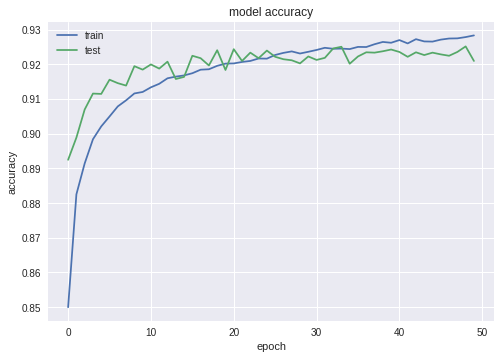

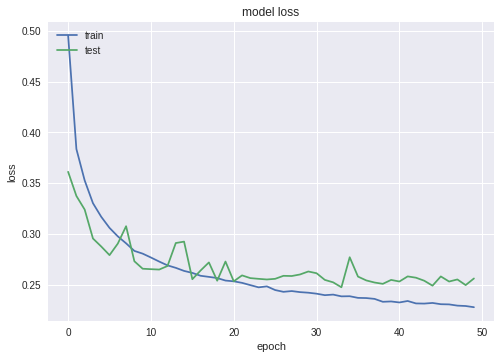

In [63]:
# Plot the graph
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test accuracy

In [64]:
model.evaluate(test_dataset, test_labels)

10000/10000 [==============================] - 2s 153us/step


[0.10710327399279922, 0.9687]

In [153]:
layers_dict = dict([layer.name, layer] for layer in model.layers)
layers_dict

{'activation_1': <keras.layers.core.Activation at 0x7fdff3967b38>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7fdff44f1cf8>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7fdff3b6e390>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fdff4433da0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fdff4510f98>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fdff3b5e5c0>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fdff3b15588>,
 'dense_1': <keras.layers.core.Dense at 0x7fdff3a08780>,
 'dense_2': <keras.layers.core.Dense at 0x7fdff39d1e48>,
 'dropout_1': <keras.layers.core.Dropout at 0x7fdff3bf64a8>,
 'dropout_2': <keras.layers.core.Dropout at 0x7fdff3a81eb8>,
 'flatten_1': <keras.layers.core.Flatten at 0x7fdff39dc208>,
 'input_1': <keras.engine.topology.InputLayer at 0x7fdff45115c0>,
 'zero_padding2d_1': <keras.layers.convolutional.ZeroPadding2D at 0x7fdff4511748>}

In [0]:
layer_output = layers_dict['batch_normalization_1'].output

In [0]:
input_img = model.input
iterate = K.function([input_img],
                     [layers_dict['batch_normalization_1'].output,
                      layers_dict['zero_padding2d_1'].output])

In [0]:
input_image_data = train_dataset[500]
input_image_data = input_image_data.reshape((1,28,28,1))

In [221]:
output_dtls1, output_dtls2 = np.array(iterate([input_image_data]))
output_dtls1.shape

(1, 32, 32, 1)

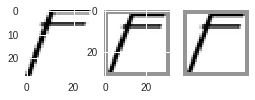

In [228]:
fig = plt.figure(figsize=(4,4))
fig.add_subplot(1, 3, 1)
plt.imshow(train_dataset[500, :, :, 0])
fig.add_subplot(1, 3, 2)
plt.imshow(output_dtls1[0, :, :, 0])
fig.add_subplot(1, 3, 3)
plt.imshow(output_dtls2[0, :, :, 0])
plt.axis('off')
fig.subplots_adjust(hspace=0.5)
plt.show()